In [3]:
!pip install keras


In [4]:
!pip install tensorflow

In [5]:
from keras import models
from keras import layers
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'

In [7]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

11501568/11490434 [==============================] - 21s 2us/step


In [8]:
x_train=x_train.reshape(x_train.shape[0], 784)
x_test=x_test.reshape(x_test.shape[0], 784)
y_train=np_utils.to_categorical(y_train, 10)
y_test=np_utils.to_categorical(y_test, 10)

In [14]:
x_validate=x_train[:6000,:]
y_validate=y_train[:6000,:]
x_train=x_train[6000:,:]
y_train=y_train[6000:,:]

In [16]:
model=models.Sequential()
model.add(layers.Dense(56,activation='relu',input_shape=(784,)))
model.add(layers.Dense(96,activation='relu'))
model.add(layers.Dense(96,activation='relu'))
model.add(layers.Dense(56,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [17]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])       
epochs=5
history=model.fit(x_train,y_train,epochs=epochs,batch_size=512,verbose=2,validation_data=(x_validate,y_validate))
print('Finished fitting.')

Epoch 1/5
94/94 - 3s - loss: 2.3513 - accuracy: 0.6732 - val_loss: 0.6758 - val_accuracy: 0.8125 - 3s/epoch - 36ms/step
Epoch 2/5
94/94 - 1s - loss: 0.5490 - accuracy: 0.8470 - val_loss: 0.4783 - val_accuracy: 0.8657 - 1s/epoch - 14ms/step
Epoch 3/5
94/94 - 1s - loss: 0.3863 - accuracy: 0.8893 - val_loss: 0.3869 - val_accuracy: 0.8950 - 1s/epoch - 14ms/step
Epoch 4/5
94/94 - 1s - loss: 0.3006 - accuracy: 0.9128 - val_loss: 0.3413 - val_accuracy: 0.9052 - 1s/epoch - 14ms/step
Epoch 5/5
94/94 - 1s - loss: 0.2480 - accuracy: 0.9267 - val_loss: 0.3102 - val_accuracy: 0.9160 - 1s/epoch - 14ms/step
Finished fitting.


Checking accuracy on test set...
20/20 [==============================] - 0s 8ms/step - loss: 0.2927 - accuracy: 0.9170

Accuracy on test set: 0.9169999957084656


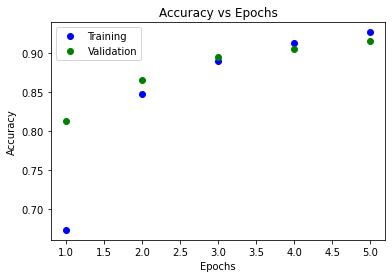

In [23]:
epoch_labels = range(1, epochs+1)
hist_dict = history.history
plt.title("Accuracy vs Epochs")
plt.plot(epoch_labels, hist_dict["accuracy"],'bo', label="Training")
plt.plot(epoch_labels, hist_dict["val_accuracy"],'go', label="Validation")
plt.legend(loc="best")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

# evaluating final performance using test data
print("Checking accuracy on test set...")
acc = model.evaluate(x_test,y_test,batch_size=512)
print("\nAccuracy on test set: " + str(acc[1]))
plt.show()